In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
def hair_remove(image):
    
    # convert image to grayScale
    grayScale = cv2.cvtColor(image_resize, cv2.COLOR_RGB2GRAY)
    
    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    
    # apply thresholding to blackhat
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    
    # inpaint with original image and threshold image
    final_image = cv2.inpaint(image_resize,threshold,1,cv2.INPAINT_TELEA)
    
    final_image = cv2.medianBlur(final_image,5)
    
    return final_image

[]

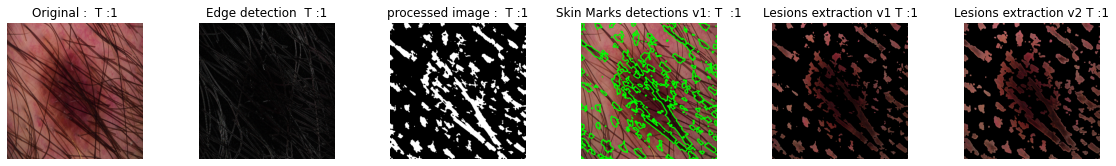

In [11]:
# Set Up matplotlib figure size
plt.figure(figsize=(20,2.5))
    
    # read and reduce the image size to 512 by 512 pixels 
image = cv2.imread("C:/Users/karthik/Desktop/data/3.jpg")
    
image_resize = cv2.resize(image,(512,512))
    
height, width, layers = image.shape
size = (width,height)

    # original image plot 
plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original : '+" T :" + str(target[i]))
 

    # Create an Edge detection Laplacian filter
lap = cv2.Laplacian(image_resize,cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
    
plt.subplot(1, 6, 2)
plt.imshow(cv2.cvtColor(lap, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Edge detection '+ " T :" + str(target[i]))
    
# Hair removal and adaptive threshold 
final_image = hair_remove(image_resize)
gray = cv2.cvtColor(final_image,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,256,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,73,7)
    
    # ploting the threshold 
plt.subplot(1, 6, 3)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('processed image : '+" T :" + str(target[i]))

    
    # finding the contours on the image 
c,h=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
cv2.drawContours(image_resize,c,-1,(0,255,0),3)
    

    # ploting the contours 
plt.subplot(1, 6, 4)
plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Skin Marks detections v1:' +" T  :" + str(target[i]))
    
    
    # creating dilate with 2 by 2 kernel 
kernel = np.ones((2,2),np.uint8)
dial1 = cv2.dilate(thresh,kernel,iterations=3)
    
    # create a morphologyEx it's like the dilate but sharper
kernel = np.ones((2,2),np.uint8)
dial = cv2.morphologyEx(thresh,cv2.MORPH_ELLIPSE,kernel)
    
    # create the final image 
img1=cv2.bitwise_and(final_image, final_image, mask=dial1)
img2=cv2.bitwise_and(final_image, final_image, mask=dial)
    
    #ploting the Lesions extraction 
plt.subplot(1, 6, 5)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Lesions extraction v1'+ " T :" + str(target[i]))
    
plt.subplot(1, 6,6)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Lesions extraction v2'+ " T :" + str(target[i]))
    
plt.plot()

[]

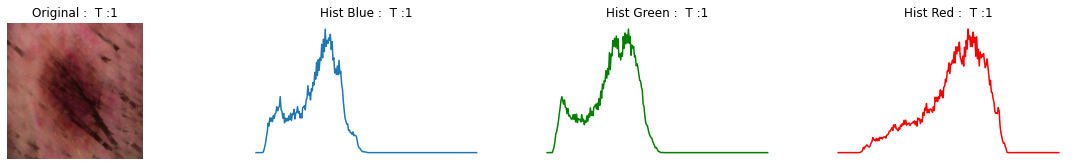

In [14]:
    # Set Up matplotlib figure size
    plt.figure(figsize=(20,2.5))
    
    # read and reduce the image size to 512 by 512 pixels 
    image = cv2.imread("C:/Users/karthik/Desktop/data/3.jpg")

    image_resize = cv2.resize(image,(512,512))

    height, width, layers = image.shape
    size = (width,height)

    final_image = hair_remove(image_resize)
    # original image plot 
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original : '+" T :" + str(target[i]))
    
    # colors in the image histogram 
    hist= cv2.calcHist([final_image],[0],None,[256],[0,256])
    hist2=cv2.calcHist([final_image],[1],None,[256],[0,256])
    hist3=cv2.calcHist([final_image],[2],None,[256],[0,256])

    plt.subplot(1, 4, 2)
    plt.plot(hist)   
    plt.axis('off')
    plt.title('Hist Blue : '+" T :" + str(target[i]))
    
    plt.subplot(1, 4, 3)
    plt.plot(hist2,color="green")   
    plt.axis('off')
    plt.title('Hist Green : '+" T :" + str(target[i]))

    plt.subplot(1, 4, 4)
    plt.plot(hist3,color="red")   
    plt.axis('off')
    plt.title('Hist Red : '+" T :" + str(target[i]))

    plt.plot()

In [ ]:
# SIMILARLY CAN BE DONE TO ALL OTHER PICTURES BE IT MELIGNANT OF BEGIN Type. As the goal here is to improve the DL-CNN model but not naively detect skin cancer type using open cv alone!